In [423]:
#question 1 
#Construct a training set and a test set

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import time

start=time.time()
# read external data into panda dataframes
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

XY=pd.concat([X.iloc[:,0:10],Y['DispFrames']],axis=1)
train,test=train_test_split(XY,test_size=0.3)
X_train=train.iloc[:,0:10];X_test=test.iloc[:,0:10]
Y_train = train['DispFrames']; Y_test = test['DispFrames']

In [424]:
#question 2
import itertools
def findsubsets(S,m):
    #return set(itertools.combinations(S, m))
    #S=[0,1,2,3,4,5,6,7,8]
    #m=7
    feature_select=set(itertools.combinations(S,m))
    #sublen=len(feature_select)
#print(sublen)
    feature_select=list(feature_select)
    return feature_select
#print(feature_select)
#print(type(feature_select[1]))
def Linear_NMAE(feature_select):
    sublen=len(feature_select)
    NMAE_X = pd.Series(index=range(0,sublen))
    for i in range(0,sublen):
        X_train_sub=X_train.iloc[:,list(feature_select[i])]
        X_test_sub=X_test.iloc[:,list(feature_select[i])]  
        regr_func=linear_model.LinearRegression()
        regr_func.fit(X_train_sub,Y_train)
        NMAE_X[i]=np.mean(abs(regr_func.predict(X_test_sub)-Y_test))/Y_test.mean()
    return NMAE_X

In [425]:
S=[0,1,2,3,4,5,6,7,8,9]
m=1
sub_sets_1=findsubsets(S,m)
NMAE_1=Linear_NMAE(sub_sets_1)



In [426]:
S=[0,1,2,3,4,5,6,7,8.9]
m=2
sub_sets_2=findsubsets(S,m)
NMAE_2=Linear_NMAE(sub_sets_2)

In [427]:
S=[0,1,2,3,4,5,6,7,8,9]
m=3
sub_sets_3=findsubsets(S,m)
NMAE_3=Linear_NMAE(sub_sets_3)

In [428]:
S=[0,1,2,3,4,5,6,7,8,9]
m=4
sub_sets_4=findsubsets(S,m)
NMAE_4=Linear_NMAE(sub_sets_4)

In [429]:
S=[0,1,2,3,4,5,6,7,8,9]
m=5
sub_sets_5=findsubsets(S,m)
NMAE_5=Linear_NMAE(sub_sets_5)
print(sub_sets_5[115])

(0, 1, 2, 5, 7)


In [430]:
S=[0,1,2,3,4,5,6,7,8,9]
m=6
sub_sets_6=findsubsets(S,m)
NMAE_6=Linear_NMAE(sub_sets_6)

In [431]:
S=[0,1,2,3,4,5,6,7,8,9]
m=7
sub_sets_7=findsubsets(S,m)
NMAE_7=Linear_NMAE(sub_sets_7)

In [432]:
S=[0,1,2,3,4,5,6,7,8,9]
m=8
sub_sets_8=findsubsets(S,m)
NMAE_8=Linear_NMAE(sub_sets_8)

In [433]:
S=[0,1,2,3,4,5,6,7,8,9]
m=9
sub_sets_9=findsubsets(S,m)
NMAE_9=Linear_NMAE(sub_sets_9)

In [434]:
S=[0,1,2,3,4,5,6,7,8,9]
m=10
sub_sets_10=findsubsets(S,m)
NMAE_10=Linear_NMAE(sub_sets_10)

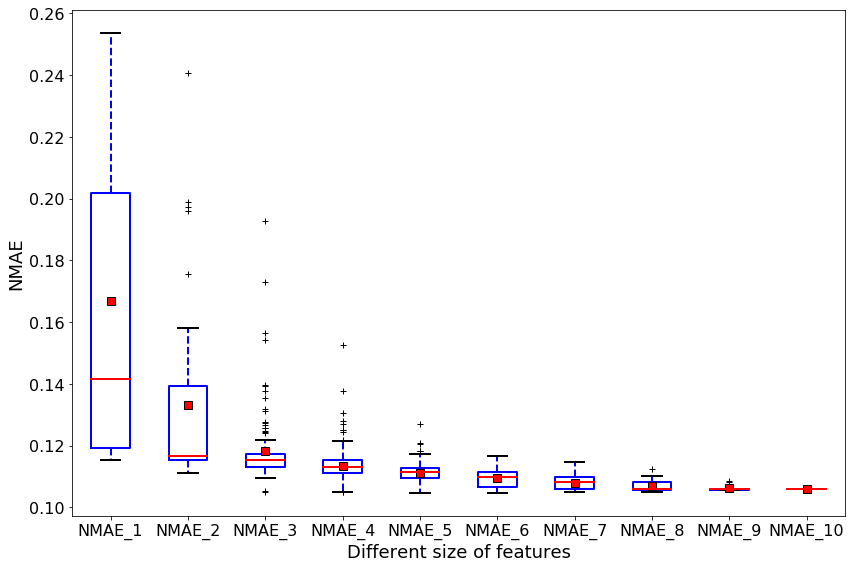

In [435]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
bp = axes.boxplot([NMAE_1,NMAE_2,NMAE_3,NMAE_4,NMAE_5,NMAE_6,NMAE_7,NMAE_8,NMAE_9,NMAE_10])

# Add an square box for average value
plt.plot(1,NMAE_1.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(2,NMAE_2.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(3,NMAE_3.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(4,NMAE_4.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(5,NMAE_5.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(6,NMAE_6.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(7,NMAE_7.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(8,NMAE_8.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(9,NMAE_9.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(10,NMAE_10.mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')

### Customizing Boxes

# Change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='blue', linewidth=2)

# Change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2, linestyle='dashed')

# Change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#000000', linewidth=2)

# Change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red', linewidth=2)

# change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='blue', alpha=1)
    
# Customizing plot (changing font size, labels)
font_size = 18
axes.set_xticklabels(['NMAE_1','NMAE_2','NMAE_3','NMAE_4','NMAE_5','NMAE_6','NMAE_7','NMAE_8','NMAE_9','NMAE_10'])
plt.xlabel('Different size of features', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.show()


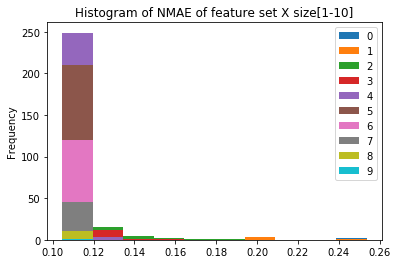

In [436]:
NMAE_total=pd.concat([NMAE_1,NMAE_2,NMAE_3,NMAE_4,NMAE_5,NMAE_6,NMAE_7,NMAE_8,NMAE_9,NMAE_10],axis=1)
#print(NMAE_total)
#print(type(NMAE_total))

NMAE_total.plot.hist(title='Histogram of NMAE of feature set X size[1-10]'); plt.show()

In [437]:
a=NMAE_total.min()
#print(type(NMAE_total))
#print(a)
b=a.min()
#print(b)
sub_sets_total=[sub_sets_1,sub_sets_2,sub_sets_3,sub_sets_4,sub_sets_5,sub_sets_6,sub_sets_7,sub_sets_8,sub_sets_9,sub_sets_10]
top_set=[]
top_feature=[]
for indexs in NMAE_total.index:
    for  i in range(len(NMAE_total.loc[indexs].values)):
        if(NMAE_total.loc[indexs].values[i] ==b):
            #print(indexs)
            #print(i)
            m=sub_sets_total[i][indexs]
            top_set.append(m)
#print(top_set)
name=list(X.columns.values)

for i in range(len(top_set[0])):
    d=top_set[0][i]
    feature_name=name[d]
    top_feature.append(feature_name)
print("The feature sets with the minimum NMAE is ",top_feature)

The feature sets with the minimum NMAE is  ['plist-sz', 'totsck', 'pgfree/s', 'proc/s', 'all_%%usr', 'cswch/s']


In [438]:

end=time.time()
print ("Total time of method 1 is:",end-start)

Total time of method 1 is: 3.3480560779571533


In [439]:
#method 2

start = time.time()
corr_all=[ ]
a=list(X_train.columns.values)
for i in range(0,10):
    X_select=X_train.iloc[:,i]
    correlation=np.corrcoef(X_select,Y_train)
    corr=correlation[0,1]**2
    corr_all.append([[a[i]],corr])
corr_sort=sorted(corr_all, key = lambda feature: feature[1],reverse=True) 
print(corr_sort)

[[['plist-sz'], 0.6910296000334842], [['totsck'], 0.6889615242877208], [['ldavg-1'], 0.6548630301785247], [['runq-sz'], 0.6423761772724483], [['file-nr'], 0.568989364217422], [['cswch/s'], 0.5357060258858977], [['all_%%usr'], 0.30959716425234396], [['%%memused'], 0.29076965195555315], [['proc/s'], 0.05434479486040351], [['pgfree/s'], 0.046857045087792995]]


In [440]:
def top_feature(n):
    top=set(corr_sort[0][0])
    for k in range(0,n-1):
        top=top | set(corr_sort[k+1][0])
    return top

In [441]:
def nmae(n):
    X_train_lm=X_train[list(top_feature(n))]
    X_test_lm=X_test[list(top_feature(n))]
    regr_func=linear_model.LinearRegression()
    regr_func.fit(X_train_lm,Y_train)
    NMAE=np.mean(abs(regr_func.predict(X_test_lm)-Y_test))/Y_test.mean()
    return NMAE

[0.11637493318342787, 0.11637493318342787, 0.11630833402400047, 0.11628321613153558, 0.11587814178826264, 0.1121979821121065, 0.11175130756439139, 0.1055711879317298, 0.10591698493780942, 0.10581134749082116]


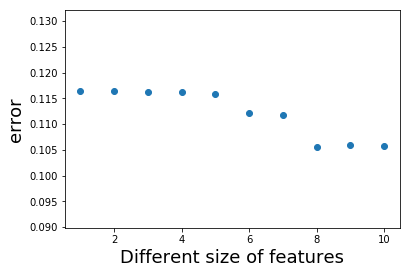

In [442]:
NMAE_list=[]
for i in range(0,10):
    NMAE=nmae(i)
    NMAE_list.append(NMAE)
print(NMAE_list)
x = [1,2,3,4,5,6,7,8,9,10]
y = NMAE_list
plt.xlabel('Different size of features', fontsize=font_size)
plt.ylabel('error', fontsize=font_size)
plt.scatter(x,y)

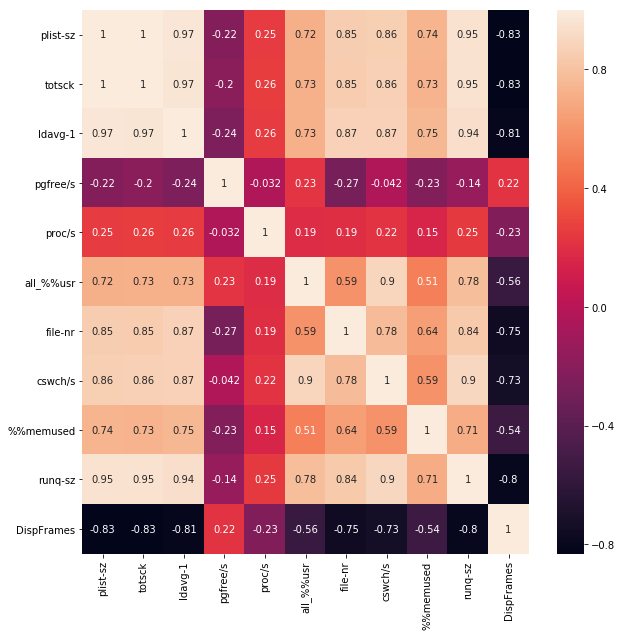

The total time of method 2 is  0.5999031066894531


In [443]:
import seaborn as sns
train.corr()
fig, axes = plt.subplots( figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.show()
end = time.time()
print ("The total time of method 2 is ",end-start)